# OnlineNewPopularity (data from UCI)

This notebook suggests a couple of ways to explore the data of a machine learning problem.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Download data

[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

In [4]:
import pyensae
pyensae.download_data("OnlineNewsPopularity.zip", url="https://archive.ics.uci.edu/ml/machine-learning-databases/00332/")

['.\\OnlineNewsPopularity/OnlineNewsPopularity.names',
 '.\\OnlineNewsPopularity/OnlineNewsPopularity.csv']

In [5]:
import pandas
data = pandas.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
data.columns = [c.strip() for c in data.columns]  # remove spaces around data
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
data.shape

(39644, 61)

In [7]:
import numpy
numeric = [c for i,c in enumerate(data.columns) if data.dtypes[i] in [numpy.float64, numpy.int64]]
len(numeric)

60

## Corr-Pair-Plots and scales

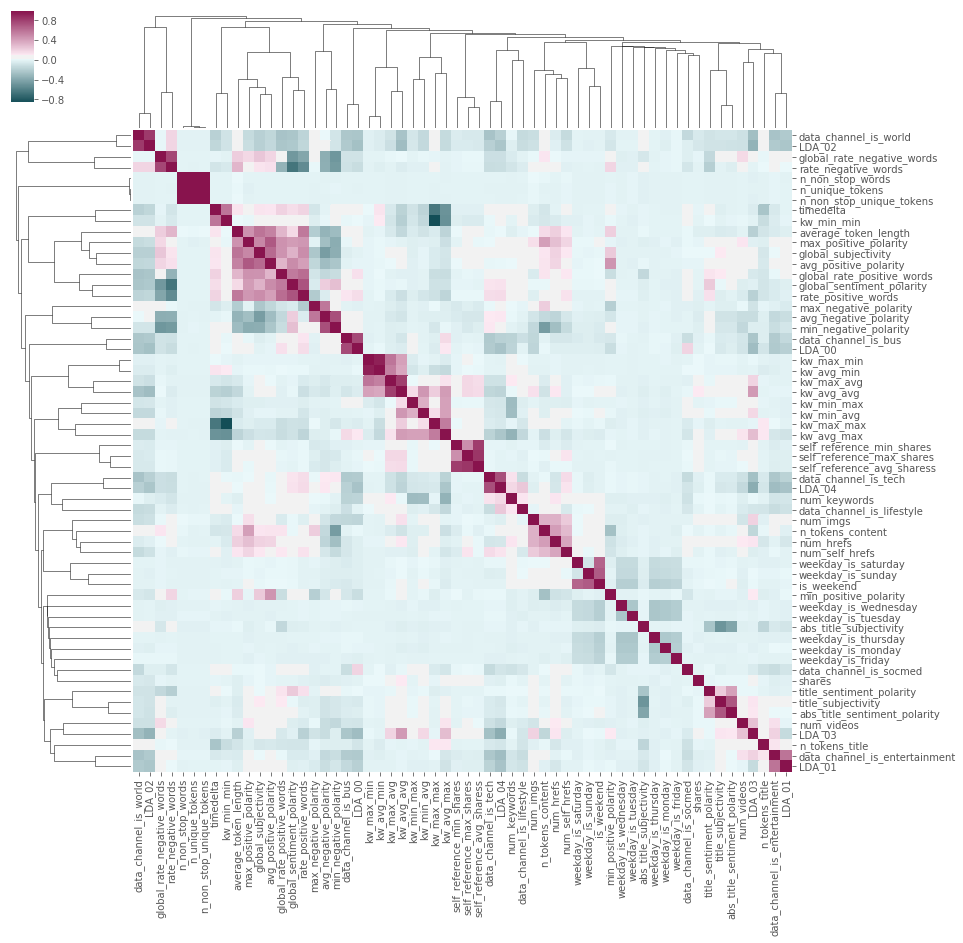

In [8]:
import seaborn
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
seaborn.clustermap(data[numeric].corr(), figsize=(14, 14), cmap=cmap);

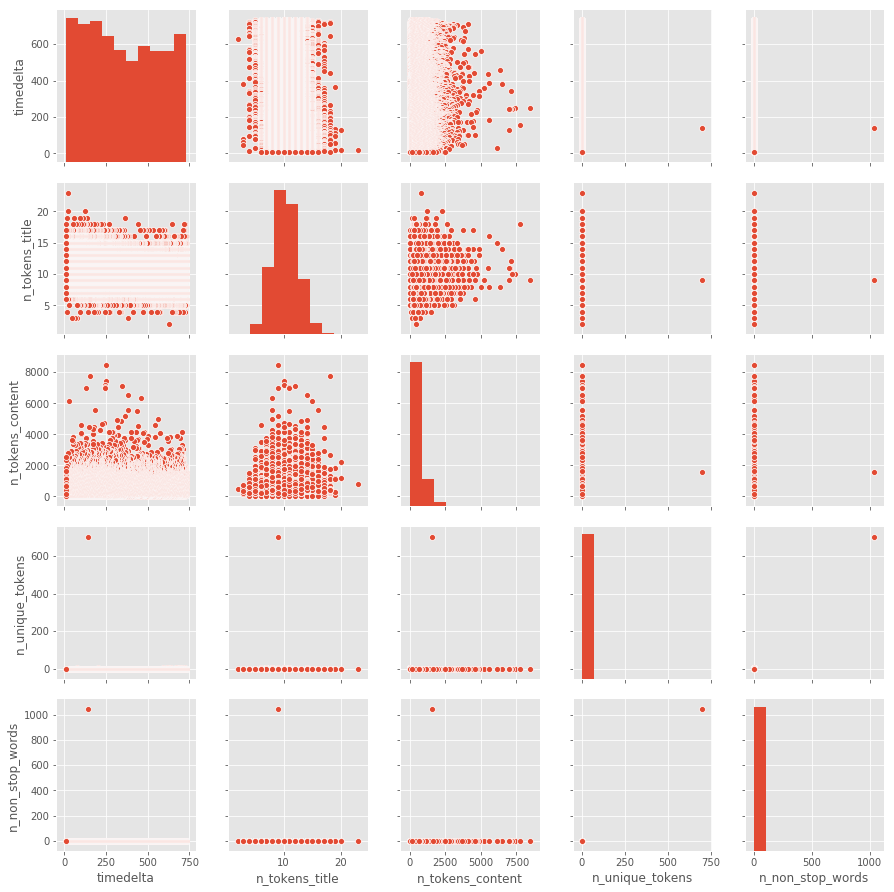

In [9]:
import seaborn
seaborn.pairplot(data[numeric[:5]]);

In [10]:
data[data.n_unique_tokens > 100]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


We remove this row as it seems an outliar:

In [11]:
data_clean = data[data.n_unique_tokens < 100].copy()

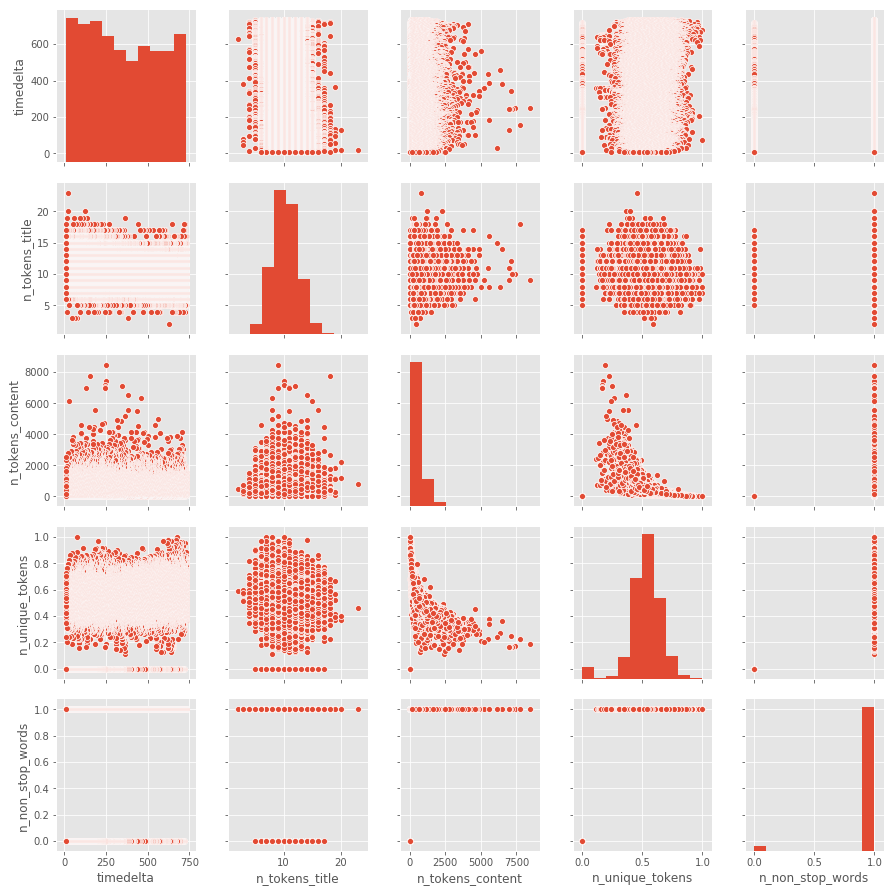

In [12]:
seaborn.pairplot(data_clean[numeric[:5]]);

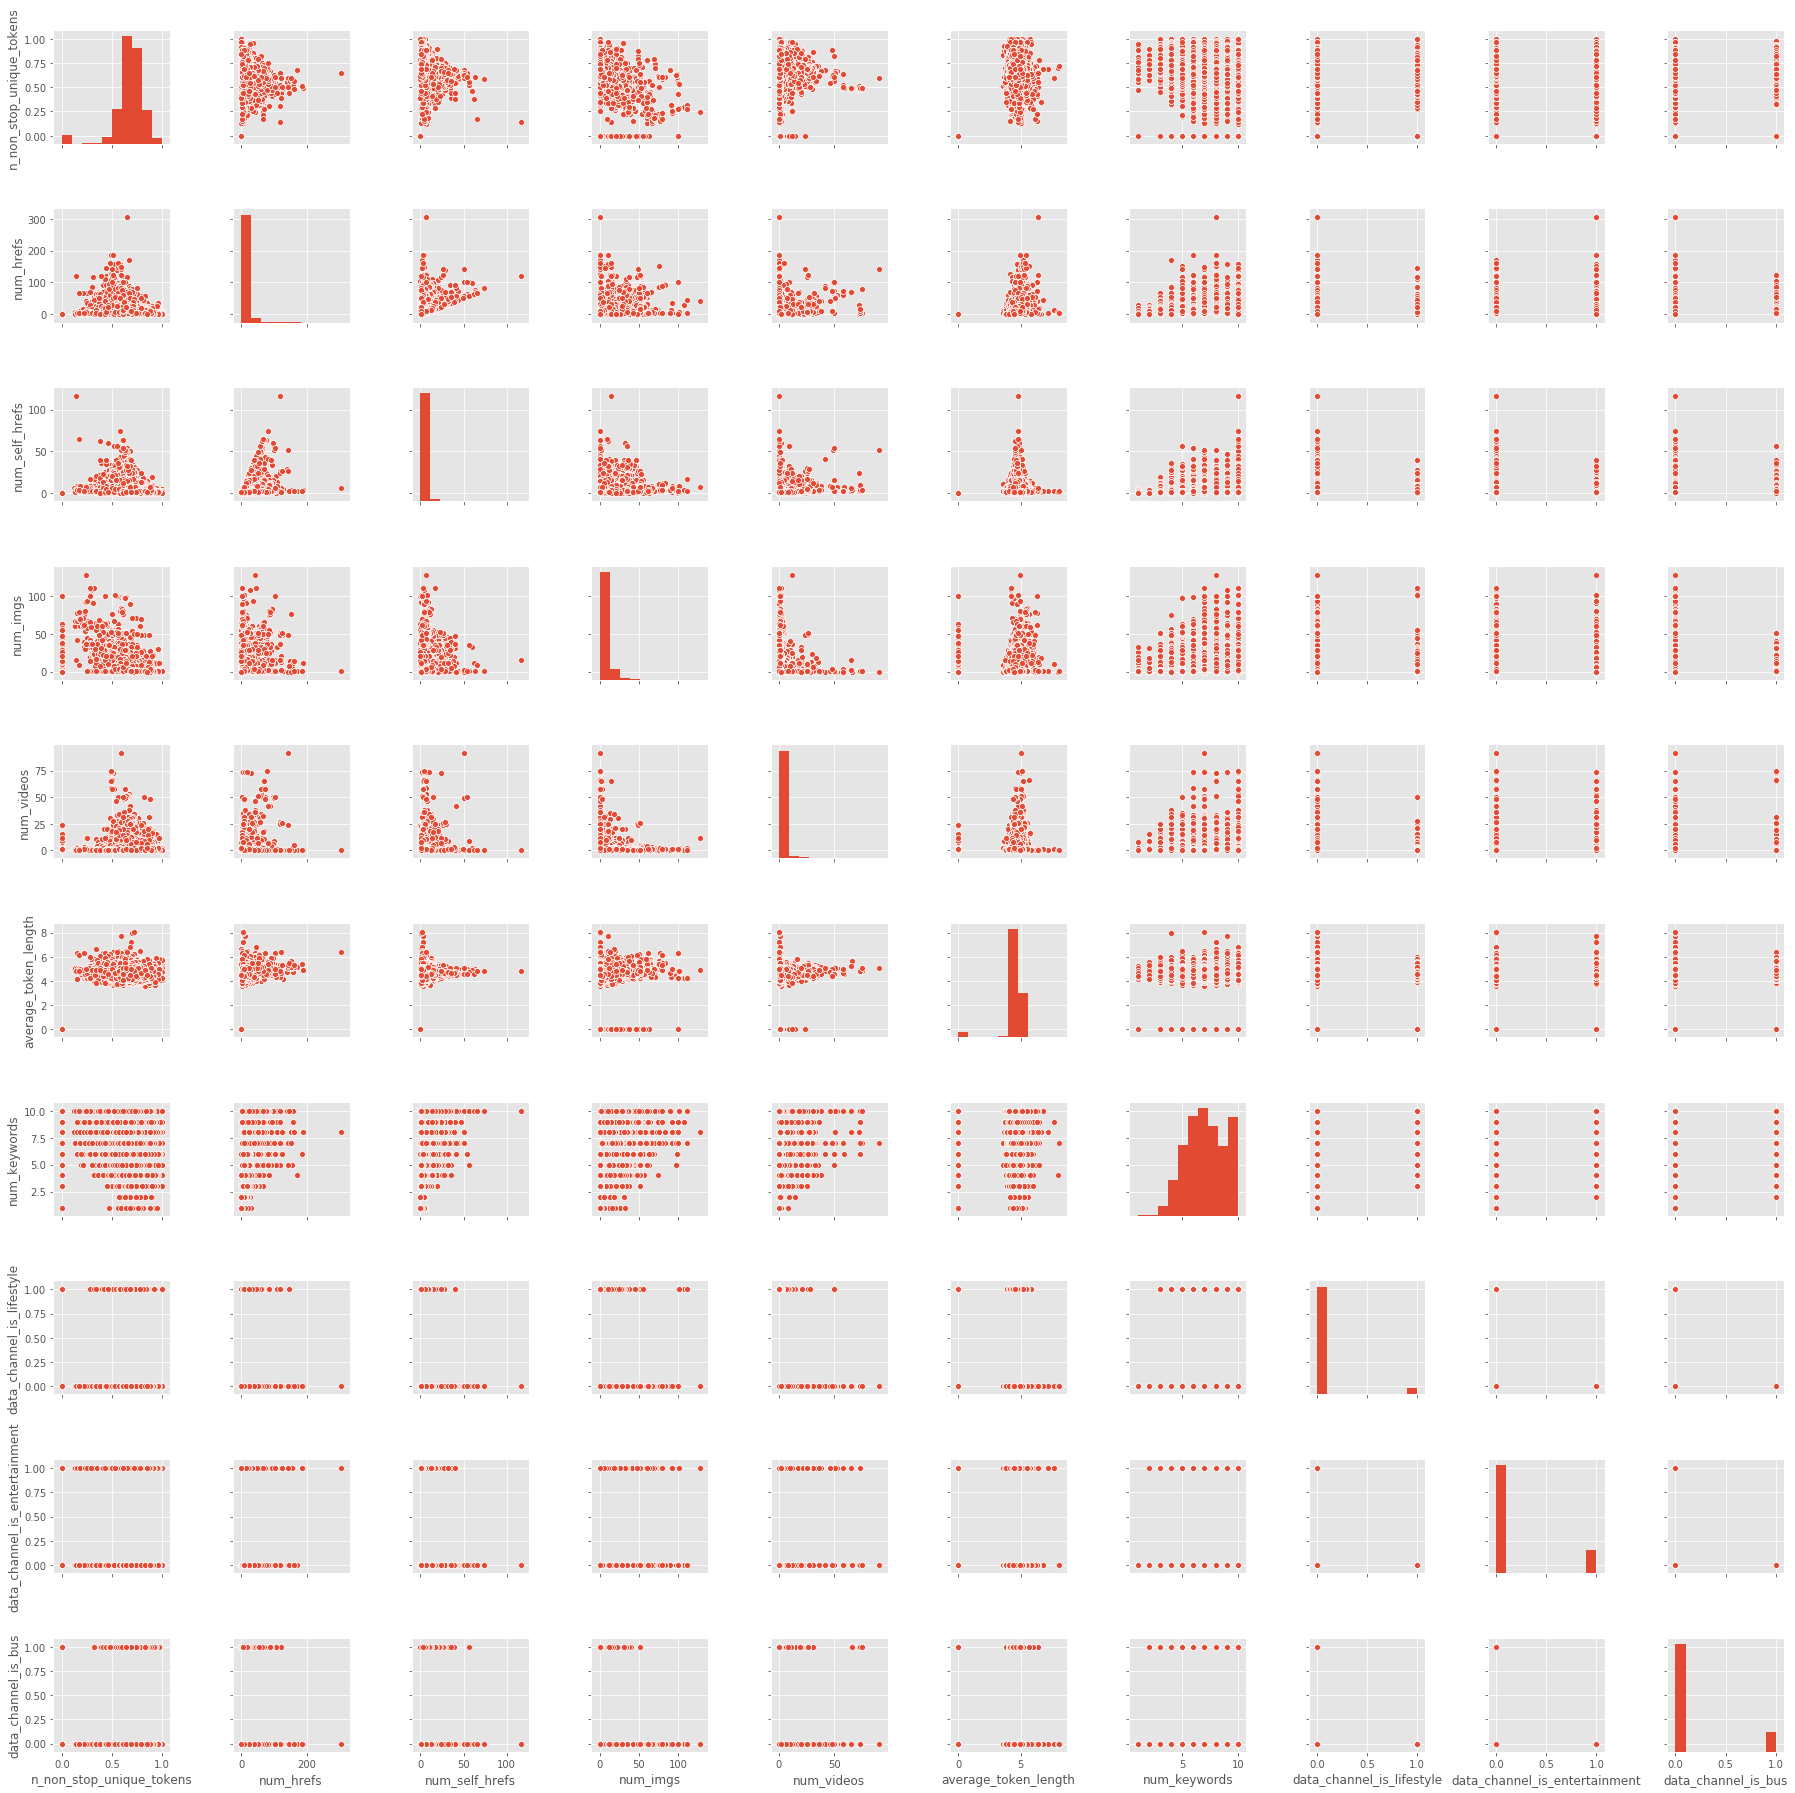

In [13]:
seaborn.pairplot(data_clean[numeric[5:15]])

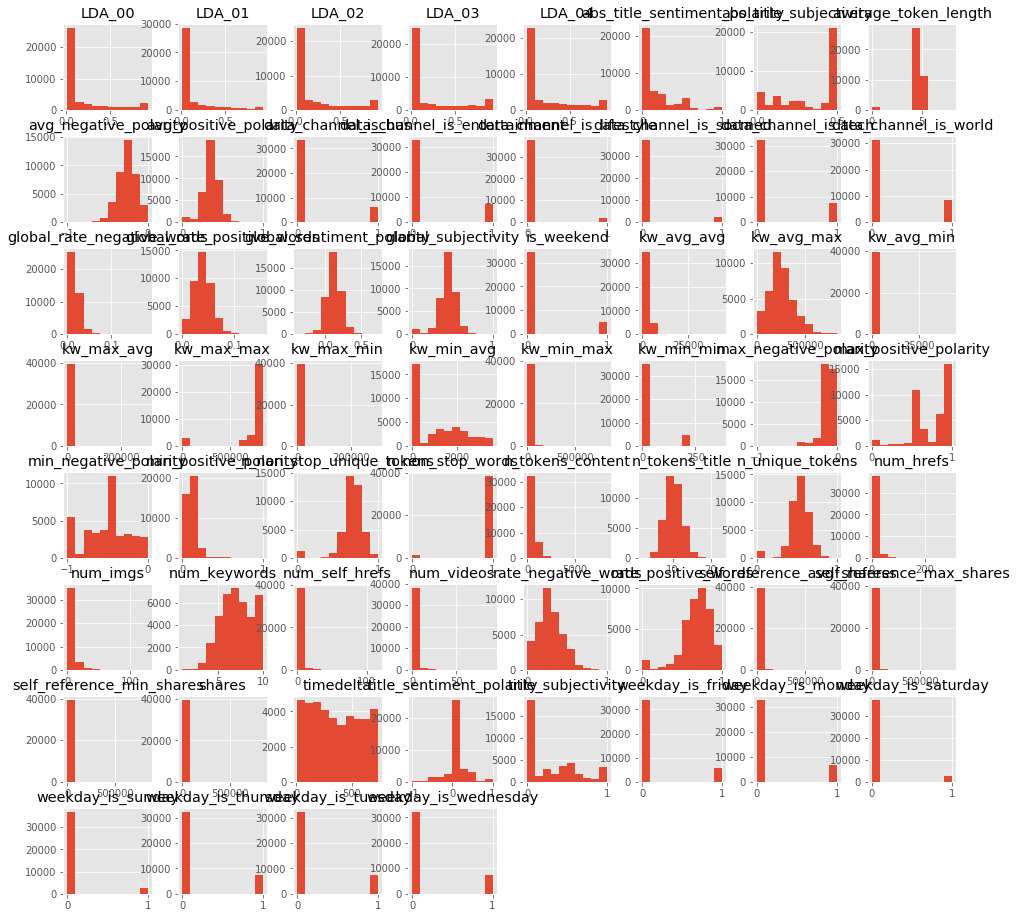

In [14]:
data_clean.hist(figsize=(16,16));

In [15]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


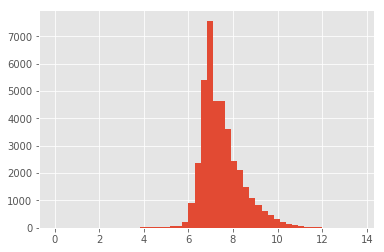

In [16]:
import numpy
numpy.log(data_clean["shares"]).hist(bins=50);

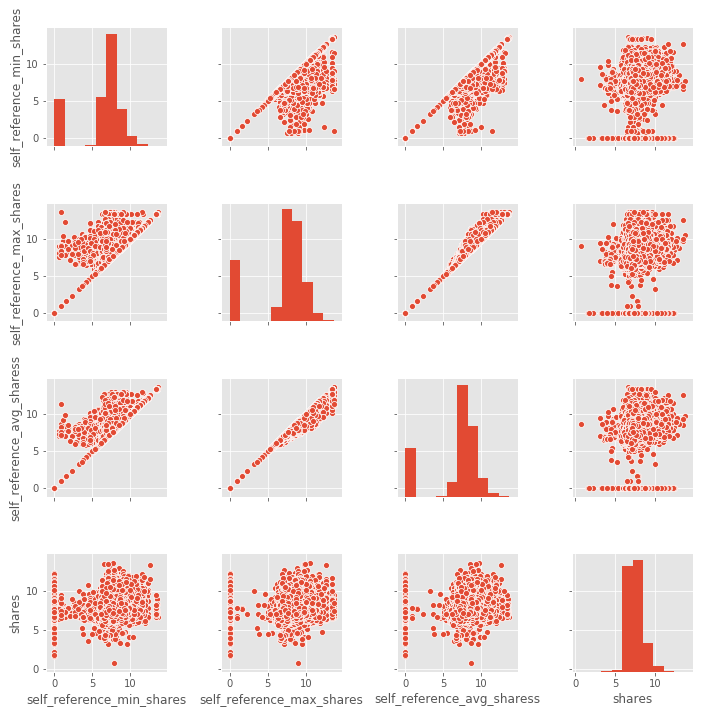

In [17]:
shares = data_clean[[c for c in numeric if "share" in c]].copy()
for c in shares.columns:
    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(shares);

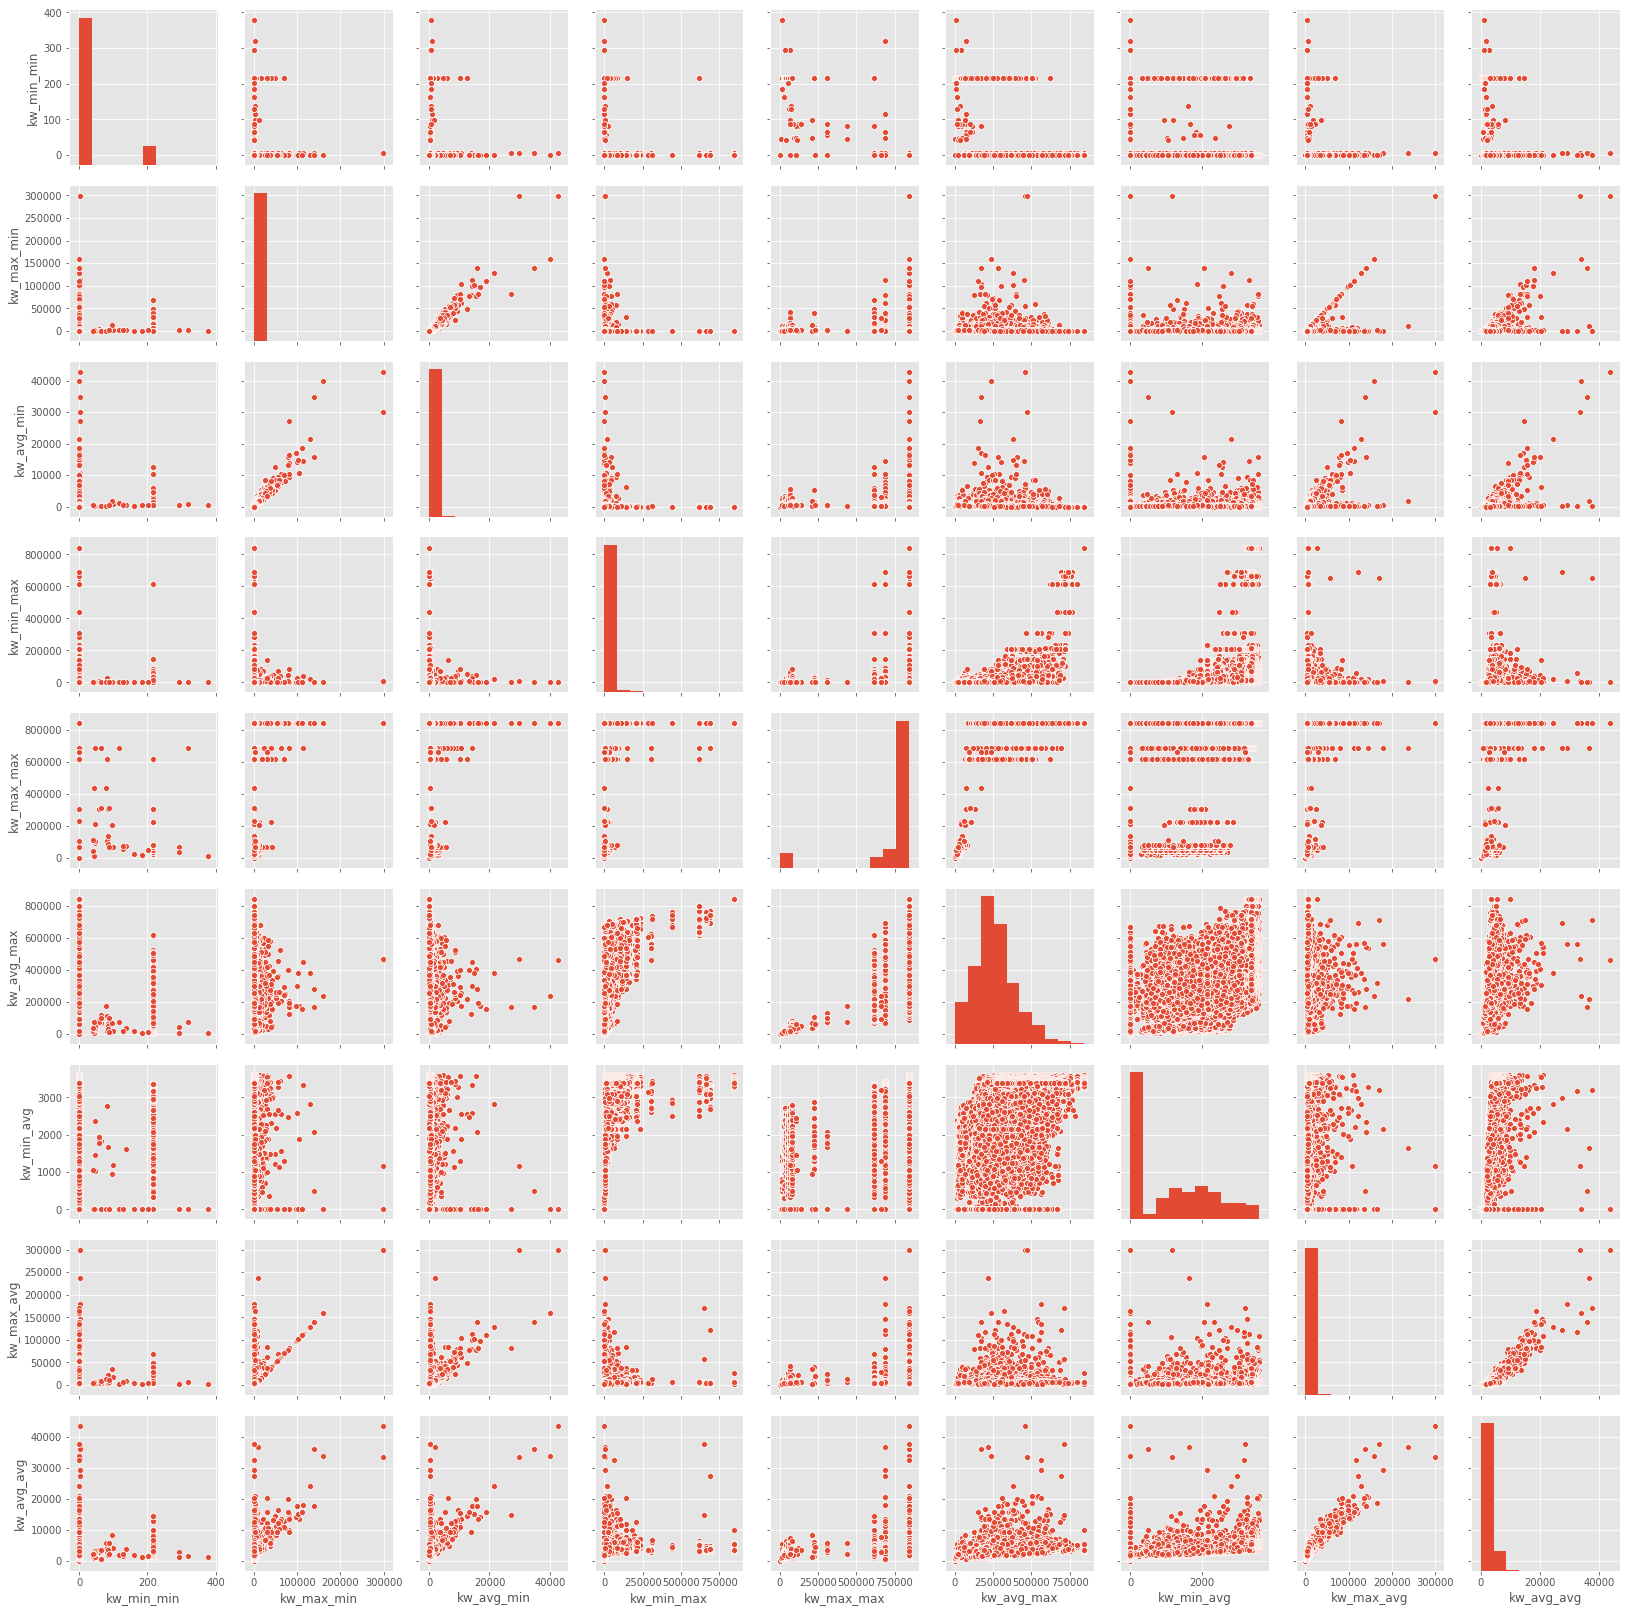

In [18]:
kw = data_clean[[c for c in numeric if "kw" in c]].copy()
#for c in shares.columns:
#    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(kw);

## Outcome, cleaning scaling

cleaning

In [19]:
data_clean = data[data.n_unique_tokens < 100].copy()

scaling: we consider that if the maximum is far away from the mediane, the scale should be logarithmic as it is far way from a gaussian law, it just applies on this problem

In [20]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["log+2"] = desc["log"] & (desc["min"] < 0)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc.loc[desc["log+2"],"scale"] = "log+2"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


In [21]:
import numpy
new_data = data_clean.copy()
for c in desc.index [ desc["scale"] == "log"]:
    new_data[c] = numpy.log(new_data[c] + 1)
for c in desc.index [ desc["scale"] == "log+2"]:
    new_data[c] = numpy.log(new_data[c] + 2)    

In [22]:
new_data.shape

(39643, 61)

In [23]:
set(new_data.dtypes)

{dtype('float64'), dtype('O')}

In [24]:
from sklearn.model_selection import train_test_split

features = new_data[[c for c in numeric if c != "shares"]]
target = new_data["shares"]
X_train, X_test, y_train, y_test = train_test_split(features, target)

## learning

[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [25]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
clr.fit(X_train, y_train)

c:\python370_x64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=10,
           min_weight_fraction_leaf=0.01, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
tpredicted = clr.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.00000,0.00755
train_expected,0.00755,1.00000


In [27]:
df = pandas.DataFrame()
df["test_predicted"] = clr.predict(X_test)
df["test_expected"] = y_test
df.corr()

,test_predicted,test_expected
test_predicted,1.000000,-0.015144
test_expected,-0.015144,1.000000


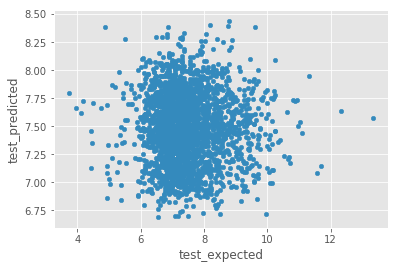

In [28]:
df.plot(x ="test_expected", y="test_predicted", kind="scatter");

[GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
est.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=10, min_weight_fraction_leaf=0.01,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [30]:
tpredicted = est.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.004143
train_expected,0.004143,1.000000


In [31]:
df = pandas.DataFrame()
df["train_predicted"] = est.predict(X_train)
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.004143
train_expected,0.004143,1.000000


[XGBRegressor](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)

In [32]:
import xgboost
clxg = xgboost.XGBRegressor(max_depth=10, learning_rate=0.3, n_estimators=50)
clxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [33]:
xgpredicted = clxg.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = xgpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,0.006745
train_expected,0.006745,1.000000


In [34]:
# trop long
#from sklearn import tree
#from sklearn.ensemble import AdaBoostRegressor
#clfr = tree.DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=10)
#clf2 = AdaBoostRegressor(clfr, n_estimators=800, learning_rate=0.5)
#clf2.fit(X_train, y_train)

## t-SNE

[Comparison of Manifold Learning methods](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [t-distributed Stochastic Neighbor Embedding (t-SNE)](http://scikit-learn.org/stable/modules/manifold.html#t-sne)

In [35]:
from sklearn.model_selection import train_test_split
X_1, X_2, y_1, y_2 = train_test_split(X_train.reset_index(drop=True), 
                        y_train.reset_index(drop=True), test_size=0.2, random_state=42)
X_1.shape, X_2.shape

c:\python370_x64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((23785, 59), (5947, 59))

In [36]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
model

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

In [37]:
W_2 = model.fit_transform(X_2)

In [38]:
i_2 = y_2.astype(int)

In [39]:
W_2.shape, X_2.shape, y_2.shape, i_2.shape

((5947, 2), (5947, 59), (5947,), (5947,))

In [40]:
mini, maxi = min(i_2), max(i_2)+1

3 (6, 1)
4 (15, 1)
5 (59, 1)
6 (1778, 1)
7 (2683, 1)
8 (962, 1)
9 (325, 1)
10 (88, 1)
11 (26, 1)
12 (5, 1)


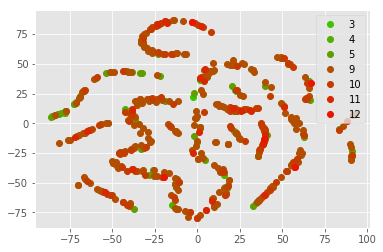

In [41]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

for i in range(mini, maxi):
    ind = numpy.array(numpy.where(i_2==i)).T
    print(i, ind.shape)
    if i in(6,7,8):
        continue
    m = "o" if i <= 9 else "o"
    r = 1.0*i / maxi
    ax.plot(W_2[ind,0], W_2[ind,1], m, color =(r, 1-r, 0.0), label=str(i))
ax.legend()
ax;